In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from IPython.display import Image
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.pipeline import Pipeline 
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

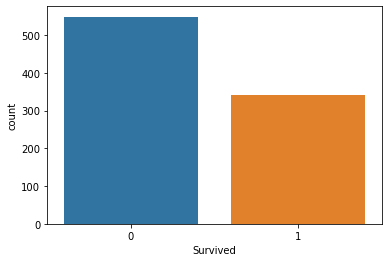

In [7]:
sns.countplot(train['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

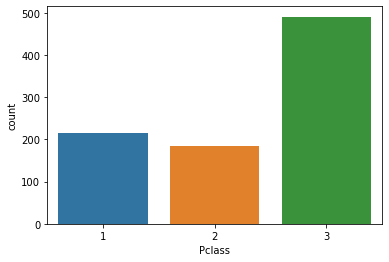

In [8]:
sns.countplot(train['Pclass'])

# Here we can see that is kind of unbalance in terms of distribution

## The third class is the lowest class which means it's the cheapest so it makes sense that most of the passengers are third-class passengers

<AxesSubplot:xlabel='Sex', ylabel='count'>

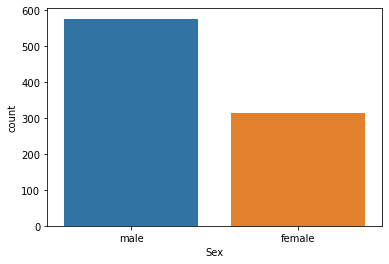

In [9]:
sns.countplot(train['Sex'])

# Again it is unbalanced in terms of distribution the male count almost double the female count

<AxesSubplot:xlabel='SibSp', ylabel='count'>

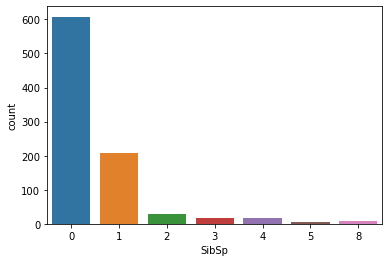

In [10]:
sns.countplot(train['SibSp'])

# most of the passengers don't have any siblings or Spouse on the board

## Sibling = brother, sister, stepbrother, stepsister
## Spouse = husband, wife 

<AxesSubplot:xlabel='Parch', ylabel='count'>

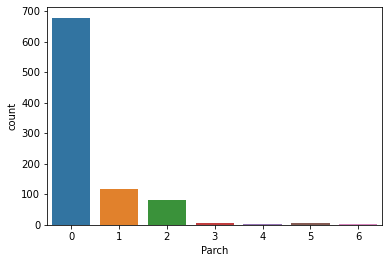

In [11]:
sns.countplot(train['Parch'])

# most of the passengers don't have any parents or children's on the board

## Parent = mother, father
## Child = daughter, son, stepdaughter, stepson
### Some children travelled only with a nanny, therefore parch=0 for them.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

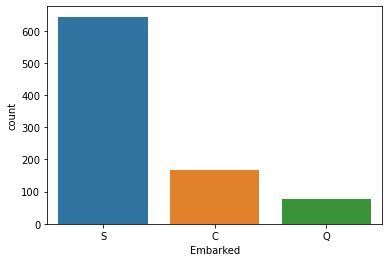

In [12]:
sns.countplot(train['Embarked'])

# most of the passengers coming from the city of Southampton in England

##      S = Southampton, C = Cherbourg, Q = Queenstown

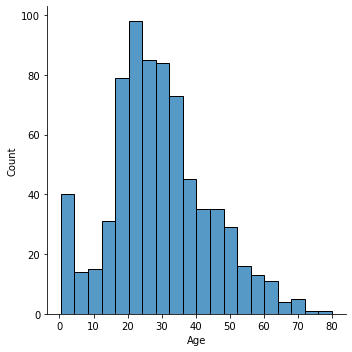

In [13]:
sns.displot(train['Age'])

# most of the passengers age are ranging from 15 to 35 years old

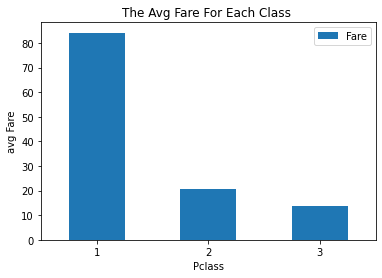

In [14]:
class_fare = train.pivot_table(index="Pclass", values="Fare")
class_fare.plot(kind="bar")
plt.xlabel("Pclass")
plt.ylabel("avg Fare")
plt.xticks(rotation=0)
plt.title("The Avg Fare For Each Class ")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

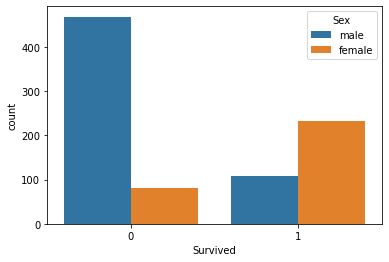

In [15]:
sns.countplot(data=train , x='Survived' , hue='Sex')

# we can see that males have higher probability of dying than females and females have higher probability of surviving

<AxesSubplot:xlabel='Survived', ylabel='count'>

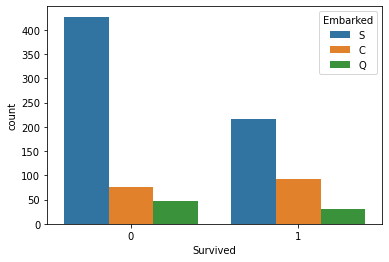

In [16]:
sns.countplot(data=train , x='Survived' , hue='Embarked')

# We can see that most people that come from Southampton have a higher probability of dying this may be caused by the high number of passengers in the titanic coming from Southampton 

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

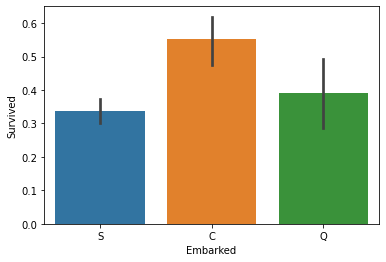

In [17]:
sns.barplot(data=train , y='Survived' , x='Embarked')

# Here we can see people coming from Cherbourg and Queenstown have a higher probability of surviving than passengers coming from Southampton

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

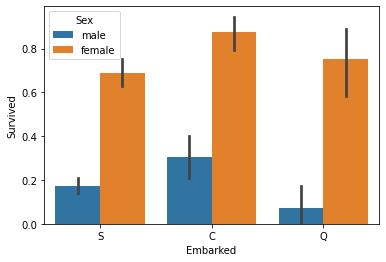

In [18]:
sns.barplot(data=train , y='Survived' , x='Embarked', hue='Sex')


# Here we can see females have a higher probability of surviving then every single class

<AxesSubplot:xlabel='Pclass', ylabel='count'>

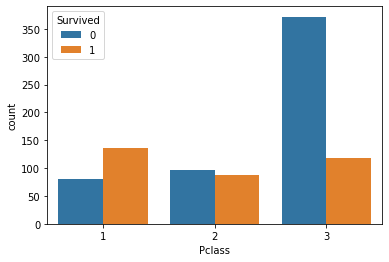

In [19]:
sns.countplot(data=train  , x='Pclass', hue='Survived')

## we can see clearly most of the third class didn't make it of the tragedy.
### just my personal hypothesis if you see most of the 3rd class rooms are in the lower levels than the second and first class and if you remember even in the movie The guys in the basement got trapped therefore I think justifies why most of 3rd class did not survive 

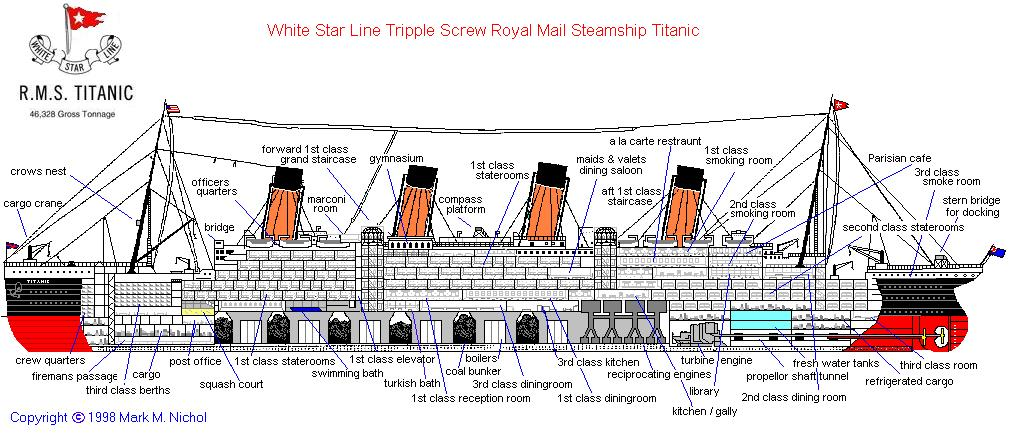

In [20]:
Image(filename='MGY_Cutaway2 (1).jpg') 

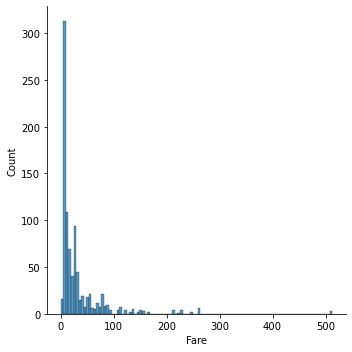

In [21]:
sns.displot(train['Fare'])

# most of the passengers fairs are ranging from 20 to 50 

## as we saw previously most of the tickets sold are third-class tickets which are the cheapest out of all classes, so the far ranging between 20 to 50 is expected

# Data Preprpcessing

In [22]:
train_len = len(train)
test_len = len(test)
# combine two dataframes to fix na values
df = pd.concat([train, test], axis=0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [24]:
train_len




891

In [25]:
test_len

418

# we can see that the number don't add up here so it added the train than the test and the index did't reset 

In [26]:
df = df.reset_index(drop=True)


In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Now it's good to go 

In [28]:
#finding the null values in the datset
(df.isna().sum()*100)/len(df)

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

# We can see that the column "Cabin" have a lot of missing values 77% 


In [29]:
# we are droping the column "Cabin" becase it's have so many missing values 
df = df.drop(columns=["Cabin"], axis=1)

In [30]:
# filling the missing values using mean of that column only numerical columns
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [31]:
# finding out the most occurred city in the column

df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [32]:
# filling the missing values of the categorical column by the most by the most occurred city in the column

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

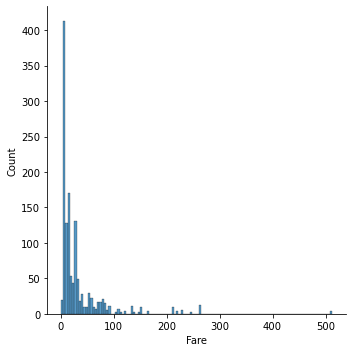

In [33]:
sns.displot(df['Fare'])

#  The graph is right skewed distribution sowe think to use log transformation to make the data more normal distributed

In [34]:
# log transformation
df['Fare'] = np.log(df['Fare']+1)

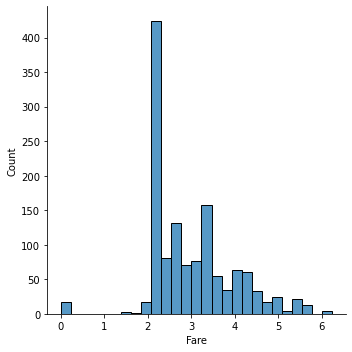

In [35]:
sns.displot(df['Fare'])

# The graph looks better now but still needs work to make it more of a normally distributed


In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,2.202765,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,2.202765,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,4.699571,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,2.110213,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,2.202765,S


In [37]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True, prefix='Gender')
df = pd.get_dummies(df, columns=['Embarked'],drop_first=True, prefix='Embarked')

In [38]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Gender_male,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,2.110213,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,4.280593,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,2.188856,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,3.990834,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,2.202765,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",29.881138,0,0,A.5. 3236,2.202765,1,0,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",39.000000,0,0,PC 17758,4.699571,0,0,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",38.500000,0,0,SOTON/O.Q. 3101262,2.110213,1,0,1
1307,1308,NaN,3,"Ware, Mr. Frederick",29.881138,0,0,359309,2.202765,1,0,1


In [39]:
df = df.drop(['Ticket','Name','PassengerId'],axis='columns')

# Correlation matrix

<AxesSubplot:>

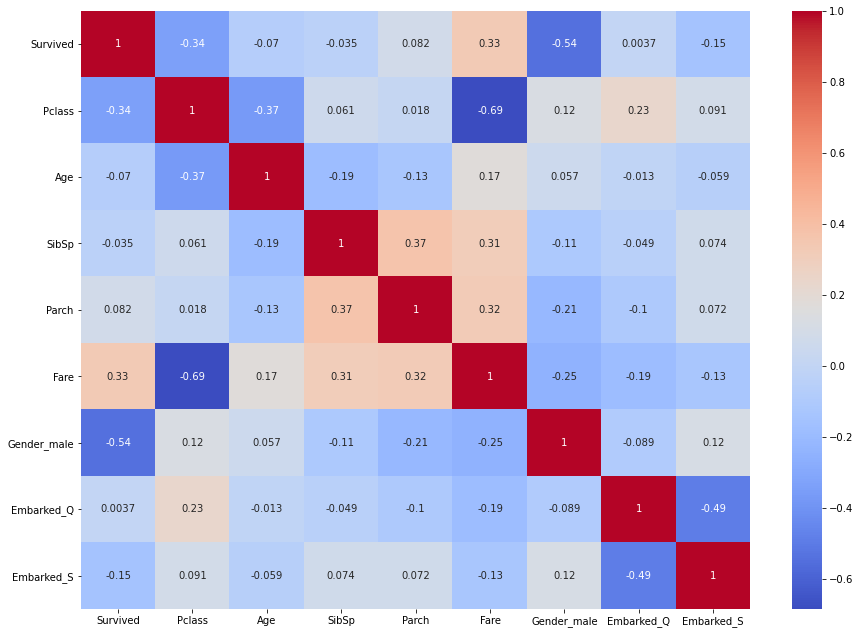

In [40]:
corr = df.corr()
plt.figure(figsize=(15,11))
sns.heatmap(corr,annot=True , cmap='coolwarm')


# We can see that the outcome column have some correlation to the class and Fare columns, We can see that the survivability of the passengers has a negative correlation with the gender column, hence we can now establish that being a man in this tragedy would diminish the passenger's survivability.

## Fare and Pclass columns are are highly negatively correlated (-0.69) and they don't connect directly to the outcome feature therefore we should consider removing one of them as a part of Removing redundant features




<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

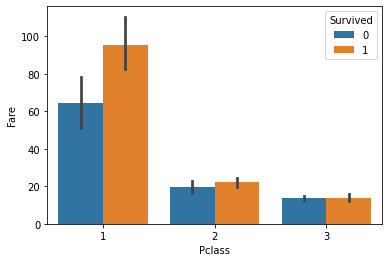

In [41]:
sns.barplot(data=train , x='Pclass' , y='Fare', hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

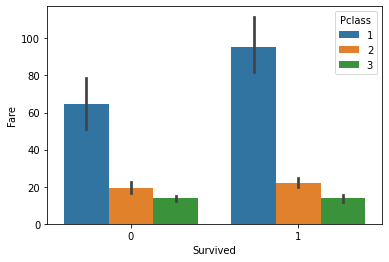

In [42]:
sns.barplot(data=train , x='Survived' , y='Fare', hue='Pclass')

In [44]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,2.110213,1,0,1
1,1.0,1,38.0,1,0,4.280593,0,0,0
2,1.0,3,26.0,0,0,2.188856,0,0,1
3,1.0,1,35.0,1,0,3.990834,0,0,1
4,0.0,3,35.0,0,0,2.202765,1,0,1


In [45]:
df = df.drop('Fare',axis='columns')

## We removed the fair column since the fair and class columns had the identical information, making the fair column redundant, and it is preferable for the model to remove one of them.

In [47]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Gender_male,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,1,0,1
1,1.0,1,38.0,1,0,0,0,0
2,1.0,3,26.0,0,0,0,0,1
3,1.0,1,35.0,1,0,0,0,1
4,0.0,3,35.0,0,0,1,0,1


In [48]:
df.isnull().sum()

Survived       418
Pclass           0
Age              0
SibSp            0
Parch            0
Gender_male      0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [49]:
df = df.dropna()

In [50]:
# Input Features 
x = df.drop(columns=['Survived'], axis=1) 
# Target Feature
y = df['Survived']




In [51]:
from sklearn.svm import SVC
# Specify the hyperparameter 
parameters = {'SVM__C': [1, 10, 100],#3
              'SVM__gamma': [0.1, 0.01],#2
              'SVM__kernel': ['rbf']}#1

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=21 , stratify =y)

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

# Model Training

In [52]:
from sklearn.model_selection import cross_val_score


def classify(model):
  
    model.fit(X_train, y_train)
    print('Accuracy:', model.score(X_test, y_test))
    
    score = cross_val_score(model,x,y , cv=5)
    print(score)
    print('cv Score:', np.mean(score))


## Default Parameters


In [53]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
classify(LR_model)

Accuracy: 0.7932960893854749
[0.79329609 0.78089888 0.79775281 0.76404494 0.8258427 ]
cv Score: 0.7923670830456343


In [54]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
classify(DT_model)

Accuracy: 0.7597765363128491
[0.72067039 0.79775281 0.80898876 0.78651685 0.83146067]
cv Score: 0.7890778984370096


In [55]:
from sklearn.ensemble import ExtraTreesClassifier
ET_model = ExtraTreesClassifier()
classify(ET_model)

Accuracy: 0.776536312849162
[0.72625698 0.78089888 0.8258427  0.78089888 0.82022472]
cv Score: 0.7868244303559099


In [56]:
NN_model = MLPClassifier()
classify(NN_model)

Accuracy: 0.7988826815642458
[0.82681564 0.83146067 0.82022472 0.79213483 0.84831461]
cv Score: 0.8237900947837549


In [57]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)
classify(knn_model)

Accuracy: 0.7318435754189944
[0.72625698 0.7752809  0.75842697 0.79775281 0.75842697]
cv Score: 0.7632289247379324


In [58]:
from sklearn.svm import SVC

from sklearn.svm import SVC
# Specify the hyperparameter 
parameters = {'SVM__C': [1, 10, 100],#3
              'SVM__gamma': [0.1, 0.01],#2
              'SVM__kernel': ['rbf']}#1


# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]


# instantiate the pipeline
pipeline = Pipeline(steps)

# instantiate the GridSeachCV
cv = GridSearchCV(pipeline, param_grid=parameters)
# Fit to the training set
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

confusion_matrix(y_test, y_pred)

print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7932960893854749
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       110
         1.0       0.80      0.62      0.70        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}


In [59]:
from sklearn.ensemble import RandomForestClassifier


parameters = {'RandomForest__criterion':['gini', 'entropy'],
              'RandomForest__max_features':['auto', 'sqrt', 'log2'],
              'RandomForest__class_weight':['balanced', 'balanced_subsample']
             
             
             }

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('RandomForest', RandomForestClassifier())]


# instantiate the pipeline
pipeline = Pipeline(steps)

# instantiate the GridSeachCV
cv = GridSearchCV(pipeline, param_grid=parameters)
# Fit to the training set
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

confusion_matrix(y_test, y_pred)

print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))



Accuracy: 0.770949720670391
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       110
         1.0       0.69      0.72      0.71        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

Tuned Model Parameters: {'RandomForest__class_weight': 'balanced_subsample', 'RandomForest__criterion': 'entropy', 'RandomForest__max_features': 'sqrt'}


## The best classifers are NN, ET and RF 

In [60]:
##  checking for overfitting by the confusion matrix in the three best classifiers

from sklearn.metrics import confusion_matrix
NN_model.fit(X_train , y_train)


print('Accuracy:', NN_model.score(X_test, y_test))
score = cross_val_score(NN_model,x,y , cv=5)
print('cv Score:', np.mean(score))


Accuracy: 0.7932960893854749
cv Score: 0.8215303496327915


In [61]:
pred = NN_model.predict(X_test)
confusion_matrix(y_test, pred)

array([[99, 11],
       [26, 43]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report 
print(classification_report(y_test ,pred))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       110
         1.0       0.80      0.62      0.70        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179



In [63]:
ET_model = ExtraTreesClassifier()
ET_model.fit(X_train, y_train)
print('Accuracy:', ET_model.score(X_test, y_test))
score = cross_val_score(ET_model,x,y , cv=5)
print('cv Score:', np.mean(score))


Accuracy: 0.770949720670391
cv Score: 0.7879543029313917


In [64]:
pred = ET_model.predict(X_test)
confusion_matrix(y_test, pred)

array([[89, 21],
       [20, 49]], dtype=int64)

In [65]:
print(classification_report(y_test ,pred))

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81       110
         1.0       0.70      0.71      0.71        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [66]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

print('Accuracy:', RF_model.score(X_test, y_test))
score = cross_val_score(RF_model,x,y , cv=5)
print('cv Score:', np.mean(score))





Accuracy: 0.776536312849162
cv Score: 0.8025296591551063


In [67]:
pred = RF_model.predict(X_test)
confusion_matrix(y_test, pred)

array([[89, 21],
       [19, 50]], dtype=int64)

In [68]:
print(classification_report(y_test ,pred))

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82       110
         1.0       0.70      0.72      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



## We can see the best model is the SVM and the NN model than the RF and ET 